# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [2]:
df_car = pd.read_csv("car_price_prediction.csv")

👉 Read the first 6 rows in the dataset.

In [3]:
df_car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,542,1399,32,1242,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,12,12
1,44731507,752,1018,8,658,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,1,8
2,45774419,317,-,21,684,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,1,2
3,45769185,141,862,16,661,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,14,0
4,45809263,451,446,21,684,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,12,4


👉 Data type and checking null in dataset.

In [4]:
print(df_car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  int64  
 4   Model             18924 non-null  int64  
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  int64 

In [5]:
df_car.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

In [6]:
df_car.Manufacturer.value_counts()

Manufacturer
23    3729
58    3606
36    2043
16    1088
8     1047
      ... 
57       1
44       1
50       1
2        1
19       1
Name: count, Length: 65, dtype: int64

In [7]:
df_car.Color.value_counts()

Color
1     4944
14    4407
12    3729
7     2343
2     1376
11     622
6      321
8      252
3      185
4      177
5      143
0      134
13     122
15     105
10      39
9       25
Name: count, dtype: int64

👉 The distribution of patient gender is balanced.

In [8]:
df_car.Model.value_counts()

Model
1154    1069
1334    1067
435      929
633      910
601      534
        ... 
18         1
611        1
340        1
1132       1
1169       1
Name: count, Length: 1590, dtype: int64

👉 The distribution of blood pressure level is balanced.

In [9]:
df_car.Price.value_counts()

Price
682     274
62      264
57      237
599     236
414     233
       ... 
2000      1
2090      1
601       1
1839      1
1044      1
Name: count, Length: 2315, dtype: int64

👉 The distribution of cholesterol level is balanced.

In [10]:
df_car.describe()

,ID,Price,Manufacturer,Model,Prod. year,Cylinders,Color,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,691.125819,33.087349,862.224530,2010.914236,4.580216,7.772194,6.568379
std,9.375468e+05,586.335489,17.787356,410.990871,5.665749,1.200223,5.361955,4.322323
min,2.074688e+07,0.000000,0.000000,0.000000,1939.000000,1.000000,0.000000,0.000000
25%,4.569501e+07,188.000000,21.000000,537.000000,2009.000000,4.000000,1.000000,4.000000
50%,4.577191e+07,530.000000,32.000000,834.000000,2012.000000,4.000000,7.000000,6.000000
75%,4.580174e+07,1043.000000,54.000000,1226.000000,2015.000000,4.000000,12.000000,12.000000
max,4.581665e+07,2314.000000,64.000000,1589.000000,2020.000000,16.000000,15.000000,16.000000


In [11]:
# 1. Handle Missing Values
# For categorical columns, fill with mode
for column in ['Manufacturer','Model','Color']:
    mode_val = df_car[column].mode()[0]
    df_car[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['Price']:
    median_val = df_car[column].median()
    df_car[column].fillna(median_val, inplace=True)

check double values

In [12]:
df_car.duplicated().sum()

0

In [13]:
df_car.drop_duplicates(inplace=True)


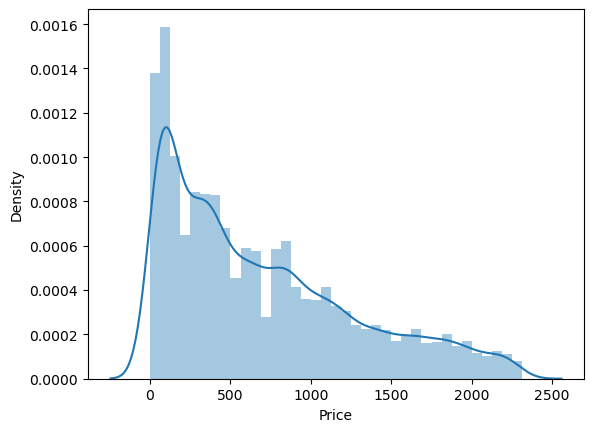

In [14]:
sns.distplot(df_car['Price']);

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

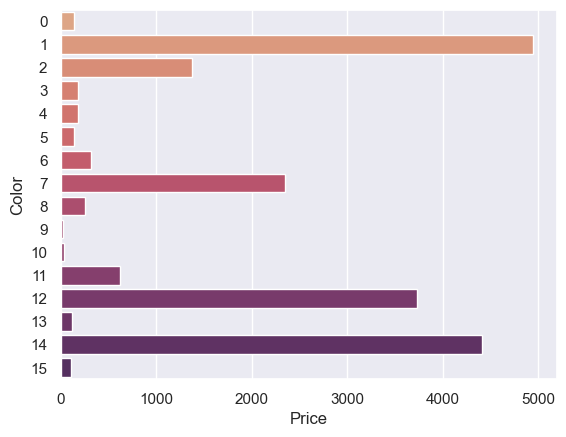

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Color", data=df_car, palette="flare")
plt.ylabel('Color')
plt.xlabel('Price')
plt.show()

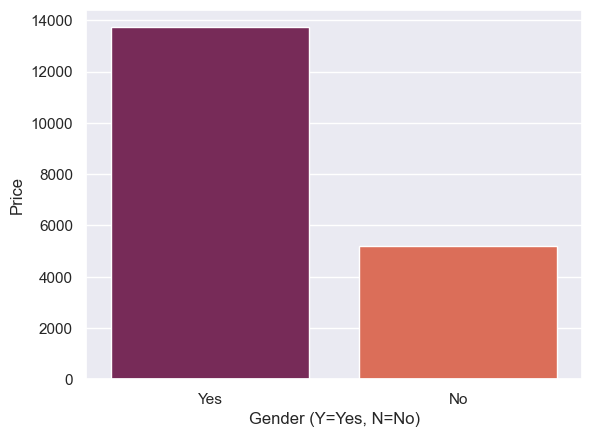

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Leather interior", data=df_car, palette="rocket")
plt.xlabel('Gender (Y=Yes, N=No)')
plt.ylabel('Price')
plt.show()

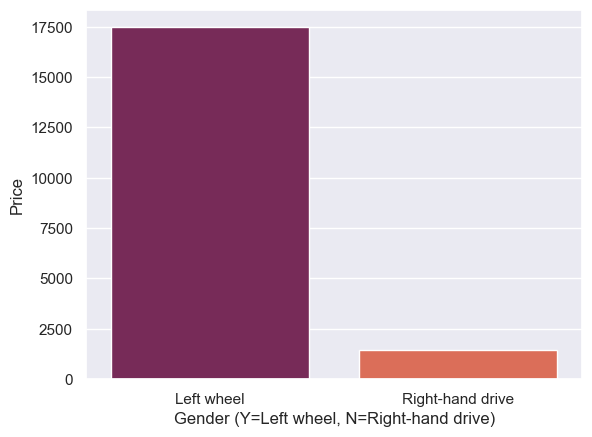

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Wheel", data=df_car, palette="rocket")
plt.xlabel('Gender (Y=Left wheel, N=Right-hand drive)')
plt.ylabel('Price')
plt.show()

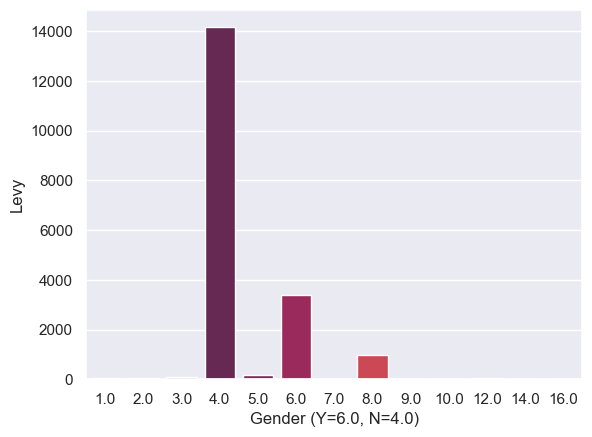

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cylinders", data=df_car, palette="rocket")
plt.xlabel('Gender (Y=6.0, N=4.0)')
plt.ylabel('Levy')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
X = df_car.drop(["Leather interior"], axis=1)
y = df_car["Leather interior"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [22]:
X_train.head()

,ID,Price,Manufacturer,Model,Prod. year,Cylinders,Color,Airbags,Levy_-,Levy_1011,...,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
14340,45793192,353,8,1090,2012,4.0,12,4,False,False,...,False,False,False,True,False,False,True,False,True,False
864,42971782,773,8,537,2018,4.0,14,8,False,False,...,False,False,False,True,False,False,True,False,True,False
16018,45787561,523,58,435,2010,4.0,14,10,False,False,...,False,True,False,True,False,False,True,False,True,False
4957,45494993,254,56,249,2003,4.0,2,2,True,False,...,False,False,False,True,False,False,True,False,True,False
17200,44036373,2253,8,431,2017,8.0,6,10,True,False,...,False,False,False,False,True,True,False,False,True,False


In [23]:
X_test.head()

,ID,Price,Manufacturer,Model,Prod. year,Cylinders,Color,Airbags,Levy_-,Levy_1011,...,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
14849,45798123,515,23,633,2008,4.0,12,4,False,False,...,False,False,False,True,False,False,True,False,True,False
11507,45809465,1296,21,684,2014,4.0,1,4,False,False,...,False,False,False,True,False,False,True,False,True,False
10597,45733718,1909,23,1334,2017,4.0,7,4,False,False,...,False,False,False,True,False,False,True,False,True,False
15033,45766333,682,23,633,2014,4.0,2,6,False,False,...,False,False,False,True,False,False,True,False,True,False
12807,45802297,1826,23,834,2016,4.0,1,4,False,False,...,False,False,False,True,False,False,True,False,True,False


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns
df_car['Manufacturer'] = le.fit_transform(df_car['Manufacturer'])
df_car['Model'] = le.fit_transform(df_car['Model'])
df_car['Color'] = le.fit_transform(df_car['Color'])
df_car['Price'] = le.fit_transform(df_car['Price'])

df_car.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,542,1399,32,1242,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,12,12
1,44731507,752,1018,8,658,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,1,8
2,45774419,317,-,21,684,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,1,2
3,45769185,141,862,16,661,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,14,0
4,45809263,451,446,21,684,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,12,4


In [25]:
df_car.to_csv("car_price_prediction.csv",index=False)

In [26]:
df_drug = pd.read_csv('car_price_prediction.csv')

In [28]:
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_train: 6432
Number of features in X_test: 3547


# 7. Models 🛠

## 7.1 Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Engine volume_0.3 Turbo
- Engine volume_0.4 Turbo
- Engine volume_1.1 Turbo
- Engine volume_3.9
- Engine volume_6.7
- ...
Feature names seen at fit time, yet now missing:
- Engine volume_0.1
- Engine volume_0.2 Turbo
- Engine volume_0.5
- Engine volume_0.6 Turbo
- Engine volume_0.8 Turbo
- ...


In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

NameError: name 'y_pred' is not defined

In [36]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

NameError: name 'cm' is not defined

<Figure size 400x400 with 0 Axes>

## save model

In [37]:
import joblib
model_filename = 'model_of _data.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

NameError: name 'train' is not defined

## load and test model

In [ ]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)
test = model_data.predict(X_test)
test


## 7.2 K Neighbours

In [ ]:
# K-Nearest Neighbors
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)
y_pred_knn = KNclassifier.predict(X_test)
KNAcc = accuracy_score(y_pred_knn, y_test)
print('K-Neighbors accuracy: {:.2f}%'.format(KNAcc * 100))

In [ ]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 7.3 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=50)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

## 7.5 Decision Tree

In [ ]:
# Decision Tree
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=5)
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_test)
DTAcc = accuracy_score(y_pred_dt, y_test)
print('Decision Tree accuracy: {:.2f}%'.format(DTAcc * 100))


In [34]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Engine volume_0.3 Turbo
- Engine volume_0.4 Turbo
- Engine volume_1.1 Turbo
- Engine volume_3.9
- Engine volume_6.7
- ...
Feature names seen at fit time, yet now missing:
- Engine volume_0.1
- Engine volume_0.2 Turbo
- Engine volume_0.5
- Engine volume_0.6 Turbo
- Engine volume_0.8 Turbo
- ...


## 7.6 Random Forest

In [ ]:
# Random Forest
RFclassifier = RandomForestClassifier(max_leaf_nodes=5, n_estimators=100, random_state=1)
RFclassifier.fit(X_train, y_train)
y_pred_rf = RFclassifier.predict(X_test)
RFAcc = accuracy_score(y_pred_rf, y_test)
print('Random Forest accuracy: {:.2f}%'.format(RFAcc * 100))

In [ ]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# 8. Model Comparison 👀

In [ ]:
# Model Comparison
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Neighbors', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [LRAcc * 100, KNAcc * 100, SVCAcc * 100, DTAcc * 100, RFAcc * 100]
})

compare_sorted = compare.sort_values(by='Accuracy', ascending=False)
print(compare_sorted)